# Import Dependencies

In [3]:
import networkx as nx
#pip3 install python-louvain
from collections import Counter
from community import community_louvain
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
####
#import infomap
#pip3 install infomap
#from infomap import Infomap

# Read in Data

In [2]:
G = nx.karate_club_graph()
# G = nx.read_edgelist('edgelist.txt')#, create_using=nx.DiGraph())

In [3]:
adj = nx.to_numpy_matrix(G)
eigvals, eigvecs = np.linalg.eig(adj)
max(eigvals)
alpha = 1./max(eigvals)
alpha

(0.148683458653162+0j)

# Network Analysis

Descriptive Statistics

In [4]:
print(nx.info(G))
print("---")
print('Diameter', nx.diameter(G))
print('Components', nx.number_connected_components(G))
print('Density',nx.density(G))
print('Degree', G.degree())

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882
---
Diameter 5
Components 1
Density 0.13903743315508021
Degree [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


Degree Distribution

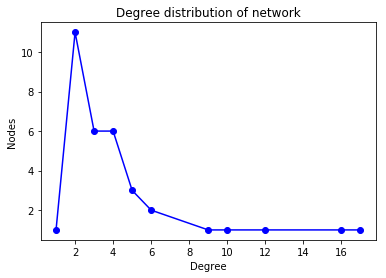

In [5]:
dc = Counter(dict(nx.degree(G)).values())
x = []
y = []
for degree, count in sorted(dc.items(), key=lambda x:x[0]):
    x.append(degree)
    y.append(count)

plt.plot(x, y,'bo-')
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.title('Degree distribution of network')
plt.show()

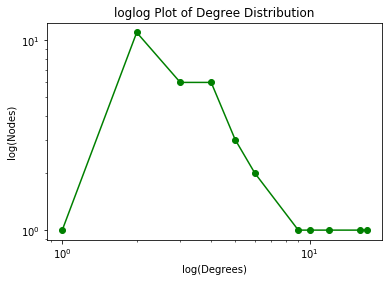

In [6]:
plt.loglog(x, y,'go-')
plt.xlabel('log(Degrees)')
plt.ylabel('log(Nodes)')
plt.title('loglog Plot of Degree Distribution')
plt.show()

Centrality Measurements

In [7]:
deg_cen = nx.degree_centrality(G)
clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
katz_cen = nx.katz_centrality(G, alpha=alpha*.9)
page_cen = nx.pagerank(G)

print('Degree centrality:', deg_cen,'\n')
print('Closeness centrality:', clo_cen, '\n')
print('Betweenness centrality:', bet_cen, '\n')
print('Eigenvector centrality:', eig_cen, '\n')
print('Katz centrality:', katz_cen)

Degree centrality: {0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151} 

Closeness centrality: {0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/algorithms/centrality/katz.py:186: ComplexWarning: Casting complex values to real discards the imaginary part
  s = 1.0 / sqrt(sum(v**2 for v in x.values()))


Question: Who are the top 5 users based on the following centrality measures: degree, pagerank, closeness, betweenness?

In [8]:
for cmes, cdict in [
    ('degree     ', deg_cen),
    ('pagerank   ', page_cen),
    ('closeness  ', clo_cen),
    ('betweenness', bet_cen)]:
    
    topk = sorted(cdict.items(), key=lambda x:x[1], reverse=True)
    topknames = [i[0] for i in topk]
    topknames = map(str, topknames[0:5])
    print("%s: %s" % (cmes, ",".join(topknames)))

degree     : 33,0,32,2,1
pagerank   : 33,0,32,2,1
closeness  : 0,2,33,31,8
betweenness: 0,33,32,2,31


# Visualizing A Network

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


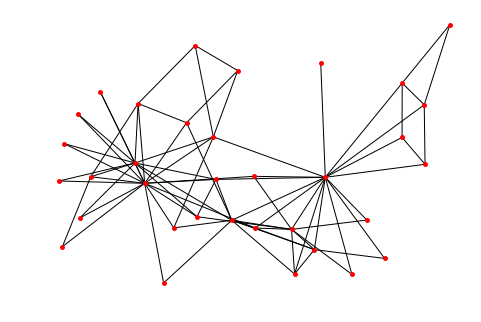

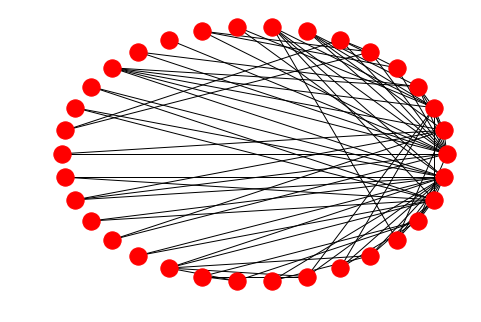

In [9]:
print(nx.info(G))
nx.draw(G, node_size=15)
plt.show()

nx.draw_circular(G)
plt.show()

# Community Detection

In [10]:
clustering_coef=nx.clustering(G)
print('Clustering:',clustering_coef)

Clustering: {0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


Is this local or global?
Compute the other.

In [11]:
part = community_louvain.best_partition(G)
size = len(set(part.values()))
print('No. Communities', size)

No. Communities 4


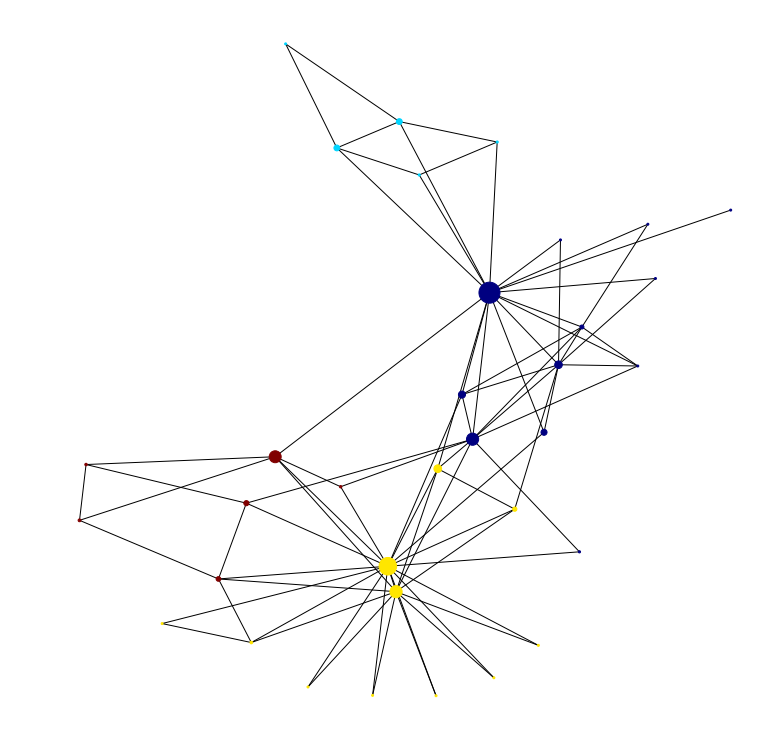

In [12]:
node_sizes = []  #initialize a list to keep track of node sizes
for n in range(0,nx.number_of_nodes(G)):  #for each node
    node_sizes.append(size+(bet_cen[n]*1000))  #make it's node size = 1000 times it's betweeness centrality + no comms

values = [part.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color=values, node_size=node_sizes, with_labels=False)
plt.gcf().set_size_inches(10, 10)
plt.show()

In [13]:
print('modularity:', community_louvain.modularity(part,G))

modularity: 0.4188034188034188


# Info Community Detection

In [14]:
def findCommunities(G):

    myInfomap = infomap.Infomap("--two-level --directed")
    network = myInfomap.network()

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        network.addLink(*e)

    print("Find communities with Infomap...")
    myInfomap.run();

    print("Found %d top modules with codelength: %f" % (myInfomap.numTopModules(), myInfomap.codelength()))

    communities = {}
    for node in myInfomap.iterTree():
        communities[node.physicalId] = node.moduleIndex()

    nx.set_node_attributes(G, name='community', values=communities)
    return myInfomap.numTopModules()


def drawNetwork(G):
    # position map
    pos = nx.spring_layout(G)
    # community ids
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    # color map from http://colorbrewer2.org/
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)

    # edges
    nx.`(G, pos)

    # nodes
    nodeCollection = nx.draw_networkx_nodes(G,
        pos = pos,
        node_color = communities,
        cmap = cmapLight
    )
    # set node border color to the darker shade
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)

    # Print node labels separately instead
    for n in G.nodes():
        plt.annotate(n,
            xy = pos[n],
            textcoords = 'offset points',
            horizontalalignment = 'center',
            verticalalignment = 'center',
            xytext = [0, 2],
            color = cmapDark(communities[n])
        )

    plt.axis('off')
    plt.show()

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 5 top modules with codelength: 2.753094


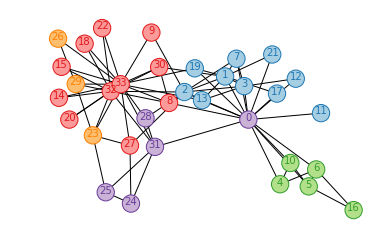

In [15]:
findCommunities(G)
drawNetwork(G)

# Label Propagation

In [16]:
G = nx.Graph()
edges = [('A','X'), ('B','X'), ('X','Y'), ('C','X'), ('C','Y'), ('D','Y')]
G.add_edges_from(edges)
G.node['A']['label'] = 'RED'
G.node['B']['label'] = 'RED'
G.node['C']['label'] = 'BLUE'
G.node['D']['label'] = 'RED'
G.node['X']['label'] = None
G.node['Y']['label'] = None

In [25]:
node_color=[]
for node_id in G.nodes():
    label = G.node[node_id]['label']
    if label == 'RED':
        G.node[node_id]['score'] = 1
        node_color.append('red')
    elif label == 'BLUE':
        G.node[node_id]['score'] = 0
        node_color.append('blue')
    else:
        G.node[node_id]['score'] = 0.5
        node_color.append('yellow')



Name: 
Type: Graph
Number of nodes: 6
Number of edges: 6
Average degree:   2.0000


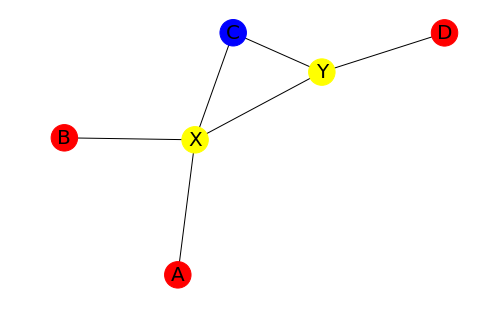

In [26]:
print(nx.info(G))
nx.draw(G, node_size=700, with_labels=True, font_size=20, node_color=node_color)
plt.show()

In [27]:
def calculate_avg_score(G, node_id):
  score_sum = 0
  n_neighbors = 0
  for neighbor_id in G[node_id]:
    score_sum += G.node[neighbor_id]['score']
    n_neighbors += 1
  return score_sum / n_neighbors

In [28]:
print(calculate_avg_score(G, 'X'))
print(calculate_avg_score(G, 'Y')) 

0.625
0.5


In [29]:
def propagate(G):
  next_scores = {}
  for node_id in G.nodes():
    if G.node[node_id]['label'] is not None:
      # scores of labeled nodes do not change
      next_scores[node_id] = G.node[node_id]['score']
    else:
      next_scores[node_id] = calculate_avg_score(G, node_id)
  for node_id in next_scores:
    G.node[node_id]['score'] = next_scores[node_id]

propagate(G) # yields the network shown below.

In [30]:
n_steps = 10
for i in range(n_steps):
  propagate(G)
  print("=== After {} steps ===".format(i+1))
  print("X = {}".format(G.node['X']['score']))
  print("Y = {}".format(G.node['Y']['score']))

=== After 1 steps ===
X = 0.625
Y = 0.5416666666666666
=== After 2 steps ===
X = 0.6354166666666666
Y = 0.5416666666666666
=== After 3 steps ===
X = 0.6354166666666666
Y = 0.5451388888888888
=== After 4 steps ===
X = 0.6362847222222222
Y = 0.5451388888888888
=== After 5 steps ===
X = 0.6362847222222222
Y = 0.5454282407407408
=== After 6 steps ===
X = 0.6363570601851852
Y = 0.5454282407407408
=== After 7 steps ===
X = 0.6363570601851852
Y = 0.5454523533950617
=== After 8 steps ===
X = 0.6363630883487654
Y = 0.5454523533950617
=== After 9 steps ===
X = 0.6363630883487654
Y = 0.5454543627829218
=== After 10 steps ===
X = 0.6363635906957305
Y = 0.5454543627829218


In [31]:
node_color=[]
for node_id in G.nodes():
    if G.node[node_id]['score'] > .5:
        node_color.append('red')
    else:
        node_color.append('blue')

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 6
Average degree:   2.0000


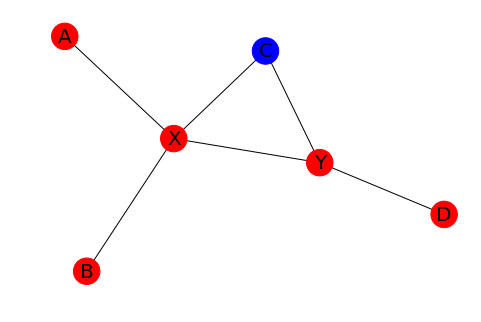

In [33]:
print(nx.info(G))
nx.draw(G, node_size=700, with_labels=True, font_size=20, node_color=node_color)
plt.show()